### Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

### Model 1 - P or M (Logistic Regression)

In [2]:
df = pd.read_csv('../Data/CVEC_phishing_malware.csv')
X = df.drop(columns=['phis_orMal'])
y = df['phis_orMal']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
pgrid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(2, 80, 2),
    'solver': ['liblinear', 'saga']
}
lr = LogisticRegression()
gs = GridSearchCV(lr, pgrid, n_jobs=-1)

In [4]:
%%time
gs.fit(X_train, y_train)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarn

CPU times: user 20.7 s, sys: 360 ms, total: 21 s
Wall time: 1min 50s


/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+02, 1.e+80]), 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [5]:
gs.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'saga'}

In [6]:
gs.score(X_train, y_train)

0.7682983682983683

In [7]:
gs.score(X_test, y_test)

0.7538461538461538

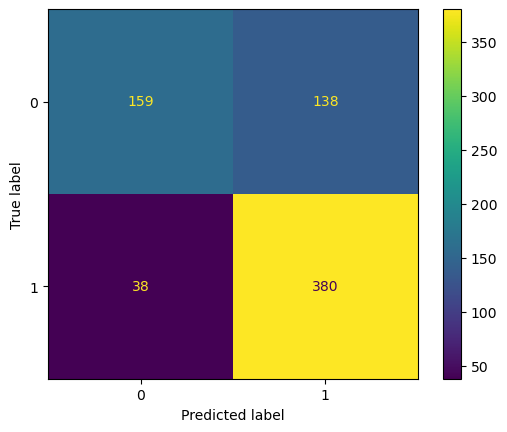

In [8]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test)

### Model 2 - P or M MultinomialNB Model

In [100]:
df1 = pd.read_csv('../Data/Phishing_or_Malware_data.csv')
df1.head()

,created_utc,title,self_text,subreddit,self_text_len,self_text_count,punc_count,phis_orMal
0,1.697552e+09,Malware on New York Times top sponsored link u...,"Today I Googled ""NYT"" and clicked the top spon...",Malware,657,111,19,0
1,1.697553e+09,Why would a Url redirect to multiple sites,I saw gmai.com on my security audit this morni...,Malware,325,61,5,0
2,1.697547e+09,Accessibility malware on android,If a user downloads a malicious app from outsi...,Malware,470,73,5,0
3,1.697298e+09,Benefits of Dynamic analysis vs Any.run(intera...,"Hello,\n\nI was wondering since [any.run](http...",Malware,356,50,10,0
4,1.697571e+09,Opened a spam pdf in hurry,Recieved an email on my phone saying norton su...,phishing,380,69,8,1


In [101]:
df1['merged'] = df1['title'] + ' ' + df1['self_text']

X1 = df1['merged'] 
y1 = df['phis_orMal']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [102]:
df1.head()

,created_utc,title,self_text,subreddit,self_text_len,self_text_count,punc_count,phis_orMal,merged
0,1.697552e+09,Malware on New York Times top sponsored link u...,"Today I Googled ""NYT"" and clicked the top spon...",Malware,657,111,19,0,Malware on New York Times top sponsored link u...
1,1.697553e+09,Why would a Url redirect to multiple sites,I saw gmai.com on my security audit this morni...,Malware,325,61,5,0,Why would a Url redirect to multiple sites I s...
2,1.697547e+09,Accessibility malware on android,If a user downloads a malicious app from outsi...,Malware,470,73,5,0,Accessibility malware on android If a user dow...
3,1.697298e+09,Benefits of Dynamic analysis vs Any.run(intera...,"Hello,\n\nI was wondering since [any.run](http...",Malware,356,50,10,0,Benefits of Dynamic analysis vs Any.run(intera...
4,1.697571e+09,Opened a spam pdf in hurry,Recieved an email on my phone saying norton su...,phishing,380,69,8,1,Opened a spam pdf in hurry Recieved an email o...


In [103]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())  
])
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pgrams = {
    'cvec__max_features': [3_000, 4_000, 5_000, 6_000, None],
    'cvec__max_df': [0.85, 0.9, 0.95, 1],
    'cvec__analyzer': ['word', None],
    'cvec__stop_words':[None, 'english'],
}

In [116]:
gs1 = GridSearchCV(pipe, pgrams, cv=kf, scoring=accuracy_score)

In [117]:
%%time
gs1.fit(X1_train, y1_train)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/skle

CPU times: user 14.7 s, sys: 148 ms, total: 14.9 s
Wall time: 14.9 s


/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 416, in fit
    Xt = self.

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__analyzer': ['word', None],
                         'cvec__max_df': [0.85, 0.9, 0.95, 1],
                         'cvec__max_features': [3000, 4000, 5000, 6000, None],
                         'cvec__stop_words': [None, 'english']},
             scoring=<function accuracy_score at 0x161488860>)

In [118]:
gs1.best_params_

{'cvec__analyzer': 'word',
 'cvec__max_df': 0.85,
 'cvec__max_features': 3000,
 'cvec__stop_words': None}

In [123]:
gs1.best_estimator_.score(X1_train, y1_train)

0.8275058275058275

In [124]:
gs1.best_estimator_.score(X1_test, y1_test)

0.7552447552447552

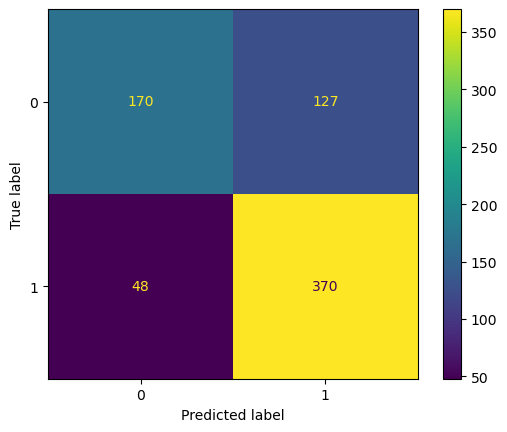

In [125]:
ConfusionMatrixDisplay.from_estimator(gs1, X1_test, y1_test)

### Model 3 - P or M Bagging Model

In [17]:
pgrid = {
    'cvec__max_features': [3_000, 4_000, 5_000, 6_000, None],
    'cvec__max_df': [0.85, 0.9, 0.95, 1],
    'cvec__analyzer': ['word', None],
    'cvec__stop_words':[None, 'english'],
    'bag__estimator__max_depth': [None, 1, 2, 3, 4, 5, 6, 7], 
    'bag__estimator__min_samples_leaf': np.arange(11, 22, 2) 
}

kf = KFold(n_splits=10, shuffle=True, random_state=2023)
tree = DecisionTreeClassifier()
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    
    ('bag', BaggingClassifier(tree, n_estimators=100, random_state=2023))
])
gs2 = GridSearchCV(pipe2, param_grid=pgrid, cv=kf, n_jobs=6)

In [18]:
%%time
gs2.fit(X1_train, y1_train)

/Users/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
19200 fits failed out of a total of 38400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6319 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anaconda3/lib/python3.11/si

CPU times: user 21.2 s, sys: 6.5 s, total: 27.7 s
Wall time: 1h 6min 42s


GridSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('bag',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                          n_estimators=100,
                                                          random_state=2023))]),
             n_jobs=6,
             param_grid={'bag__estimator__max_depth': [None, 1, 2, 3, 4, 5, 6,
                                                       7],
                         'bag__estimator__min_samples_leaf': array([11, 13, 15, 17, 19, 21]),
                         'cvec__analyzer': ['word', None],
                         'cvec__max_df': [0.85, 0.9, 0.95, 1],
                         'cvec__max_features': [3000, 4000, 5000, 6000, None],
                         'cvec__stop_words': [None, 'english']})

In [19]:
gs2.best_params_

{'bag__estimator__max_depth': None,
 'bag__estimator__min_samples_leaf': 11,
 'cvec__analyzer': 'word',
 'cvec__max_df': 0.85,
 'cvec__max_features': None,
 'cvec__stop_words': None}

In [20]:
gs2.score(X1_train, y1_train)

0.9104895104895104

In [21]:
gs2.score(X1_test, y1_test)

0.737062937062937

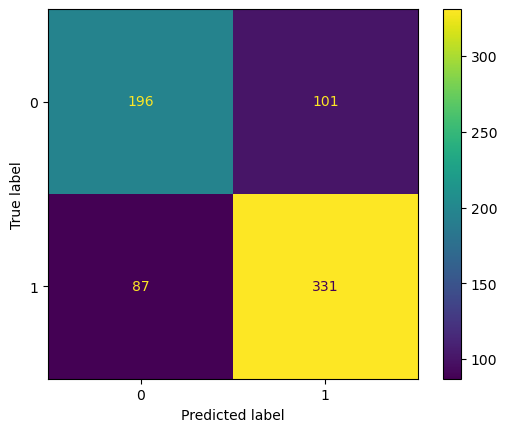

In [22]:
ConfusionMatrixDisplay.from_estimator(gs2, X1_test, y1_test)

### Model 4 - P or M Random Forest 

In [86]:
pgrid = {
    'cvec__max_features': [3_000, 4_000, 5_000, 6_000, None],
    'cvec__max_df': [0.85, 0.9, 0.95, 1],
    'cvec__analyzer': ['word', None],
    'cvec__stop_words':[None, 'english'],
    'cvec__min_df': [0.85,0.9,0.95,1],
    'rf__max_features': np.arange(1, X.shape[1] + 1),
    'rf__max_depth': np.append(np.arange(1, 10), None), 
    'rf__min_samples_leaf': np.arange(1, 31)
}
kf = KFold(n_splits=10, shuffle=True, random_state=2023)
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

rs = RandomizedSearchCV(pipe3, pgrid, cv=kf, n_iter=100, n_jobs=6)

In [77]:
%%time
rs.fit(X1_train, y1_train)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
890 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
193 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 416, in fit
    Xt = self

CPU times: user 4.49 s, sys: 245 ms, total: 4.73 s
Wall time: 46.6 s


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=6,
                   param_distributions={'cvec__analyzer': ['word', None],
                                        'cvec__max_df': [0.85, 0.9, 0.95, 1],
                                        'cvec__max_features': [3000, 4000, 5000,
                                                               6000, None],
                                        'cvec__min_df': [0.85, 0.9, 0.95, 1],
                                        'cvec__stop_words': [None, 'english'],
                                        'rf__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9, None], dtype=object),
                                        'rf__max_features': array([    1,     2,     3, ..., 20683, 20684, 20685]),
                                        'rf__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [78]:
rs.score(X1_train, y1_train)

0.9445221445221446

In [79]:
rs.score(X1_test, y1_test)

0.7496503496503496

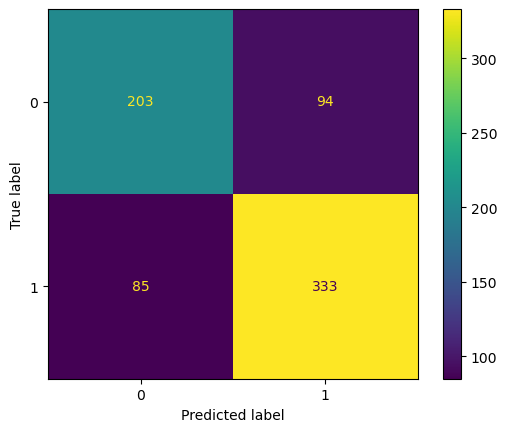

In [80]:
ConfusionMatrixDisplay.from_estimator(rs, X1_test, y1_test)

In [84]:
rs.best_params_

{'rf__min_samples_leaf': 7,
 'rf__max_features': 3142,
 'rf__max_depth': None,
 'cvec__stop_words': None,
 'cvec__min_df': 1,
 'cvec__max_features': 3000,
 'cvec__max_df': 0.85,
 'cvec__analyzer': 'word'}

In [28]:
y_pred = rs.predict(X1)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [128]:
df1['y_pred'] = y_pred
df1.to_csv('../Data/Phis_orMal_predictions.csv', index=False)

### Model 5 - Phis or Mal Random Forest V2

In [87]:
cvec_v2 = pd.read_csv('../Data/Cvec_and_values.csv')
cvec_v2.head()

,00,000,01,02,03,04,05,06,07,0700,...,youtube,zelle,zero,zillow,zip,zoom,self_text_len,self_text_count,punc_count,phis_orMal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,657,111,19,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,325,61,5,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,470,73,5,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,356,50,10,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,380,69,8,1


In [89]:
X3 = cvec_v2.drop(columns = ['phis_orMal'])
y3 = cvec_v2['phis_orMal']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [94]:
params = {
    'max_features': np.arange(1, X.shape[1] + 1), 
    'max_depth': np.append(np.arange(1, 10), None), 
    'min_samples_leaf': np.arange(1, 31) 
}
kf = KFold(n_splits=10, shuffle=True, random_state=2023)
rf1 = RandomForestClassifier(
    n_estimators=100,
    random_state=2023
)

rs2 = RandomizedSearchCV(rf1, params, cv=kf, n_iter=100, n_jobs=6)

In [95]:
%%time
rs2.fit(X3_train, y3_train)

CPU times: user 7.09 s, sys: 402 ms, total: 7.49 s
Wall time: 14min 58s


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
                   estimator=RandomForestClassifier(random_state=2023),
                   n_iter=100, n_jobs=6,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9, None], dtype=object),
                                        'max_features': array([    1,     2,     3, ..., 20683, 20684, 20685]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [96]:
rs2.score(X3_train, y3_train)

0.7095571095571096

In [97]:
rs2.score(X3_test, y3_test)

0.5622377622377622

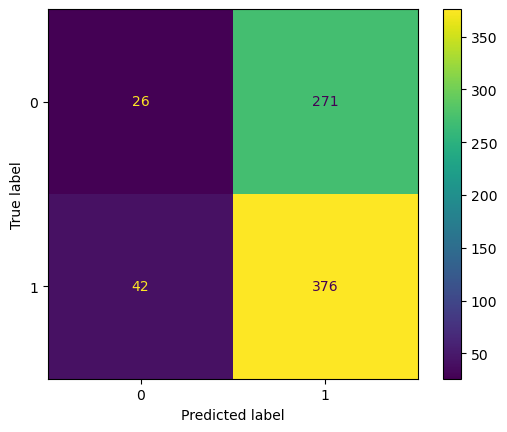

In [98]:
ConfusionMatrixDisplay.from_estimator(rs2, X3_test, y3_test)

### Model 6

In [130]:
df6 = pd.read_csv('../Data/Merged_cvec_data.csv')
X6 = df6.drop(columns=['scam_notscam'])
y6 = df6['scam_notscam']
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=2020)

In [133]:
pgrid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(2, 80, 2),
    'solver': ['liblinear', 'saga']
}
lr2 = LogisticRegression()
gs6 = GridSearchCV(lr2, pgrid, n_jobs=-1)

In [134]:
%%time
gs6.fit(X6_train, y6_train)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarn

CPU times: user 1.91 s, sys: 700 ms, total: 2.61 s
Wall time: 3min 35s


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+02, 1.e+80]), 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [138]:
gs6.score(X6_train, y6_train)

1.0

In [140]:
gs6.score(X6_test, y6_test)

0.9860365198711063

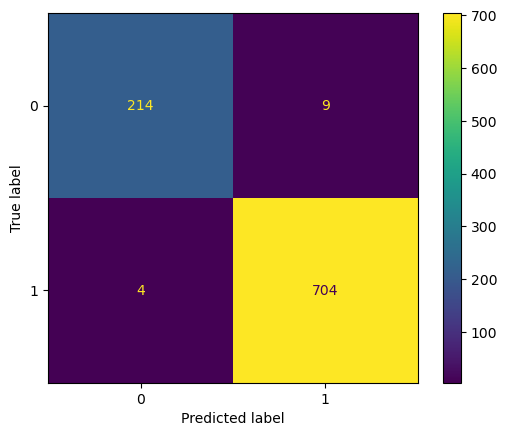

In [141]:
ConfusionMatrixDisplay.from_estimator(gs6, X6_test, y6_test)